In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [ ]:
anime = pd.read_csv('/content/Anime_data.csv', encoding='latin')

print('anime (shape):', anime.shape)
anime.head()

anime (shape): (17002, 15)


,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bountyâsuch is the life...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",TV,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"['Action', 'Magic', 'Police', 'Supernatural', ...",Witches are individuals with special powers li...,TV,['Bandai Visual'],['Sunrise'],7.34,31875.0,1278.0,74889.0,26.0,Original,"Jul 2, 2002 to Dec 24, 2002",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",It is the dark century and the people are suff...,TV,NaN,['Toei Animation'],7.04,4757.0,3968.0,11247.0,52.0,Manga,"Sep 30, 2004 to Sep 29, 2005",https://myanimelist.net/anime/8/Bouken_Ou_Beet


In [ ]:
display(anime[['Title', 'Rating', 'Producer', 'Studio']].loc[anime['Type'] == 'Movie'])

,Title,Rating,Producer,Studio
1,Cowboy Bebop: Tengoku no Tobira,8.41,"['Sunrise', 'Bandai Visual']",['Bones']
22,Neon Genesis Evangelion: Death & Rebirth,7.50,"['Movic', 'Sega', 'TV Tokyo Music', 'Audio Tan...","['Gainax', 'Production I.G']"
23,Neon Genesis Evangelion: The End of Evangelion,8.48,"['TV Tokyo', 'Toei Animation', 'Kadokawa Shote...","['Gainax', 'Production I.G']"
25,Koukaku Kidoutai,8.35,"['Bandai Visual', 'Kodansha']",['Production I.G']
28,Rurouni Kenshin: Meiji Kenkaku Romantan - Ishi...,7.63,"['Fuji TV', 'Sony Music Entertainment']",['Studio Gallop']
...,...,...,...,...
16978,UFO Robo Grendizer: Akai Yuuhi no Taiketsu,6.70,NaN,NaN
16980,Mazinger Z tai Dr. Hell,6.53,NaN,NaN
16985,Gegege no Kitarou: Chisougan,6.34,NaN,NaN
16986,Getter Robo (Movie),6.08,NaN,NaN


In [ ]:
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    text = re.sub(r'Â°', '',text)
    
    return text

anime['Title'] = anime['Title'].apply(text_cleaning)


In [ ]:
anime.isnull().sum()

Anime_id         0
Title            0
Genre         2012
Synopsis      1419
Type           634
Producer      9367
Studio        9083
Rating        2577
ScoredBy      3775
Popularity     634
Members          0
Episodes      2917
Source        1927
Aired          634
Link           634
dtype: int64

In [ ]:
anime.describe()

,Anime_id,Rating,ScoredBy,Popularity,Members,Episodes
count,17002.000000,14425.000000,1.322700e+04,16368.000000,1.700200e+04,14085.000000
mean,20446.579638,6.287867,1.139084e+04,8131.919599,2.038130e+04,11.482712
std,14342.513259,1.141401,4.328434e+04,4714.683351,7.121404e+04,44.089040
min,1.000000,1.000000,1.000000e+00,1.000000,0.000000e+00,1.000000
25%,5581.500000,5.620000,4.300000e+01,4042.500000,1.450000e+02,1.000000
50%,21334.000000,6.410000,4.780000e+02,8115.000000,1.113000e+03,1.000000
75%,34789.250000,7.090000,3.831000e+03,12208.250000,7.855750e+03,12.000000
max,40960.000000,10.000000,1.006242e+06,16338.000000,1.451708e+06,1818.000000


In [ ]:
C = anime['Rating'].mean()
C

6.287866897746972

In [ ]:
anime['ScoredBy'].describe()

count    1.322700e+04
mean     1.139084e+04
std      4.328434e+04
min      1.000000e+00
25%      4.300000e+01
50%      4.780000e+02
75%      3.831000e+03
max      1.006242e+06
Name: ScoredBy, dtype: float64

In [ ]:
m = anime['ScoredBy'].quantile(0.85)
m

12407.400000000009

In [ ]:
q_animes = anime.copy().loc[anime['ScoredBy'] >= m]
q_animes.shape

(1984, 15)

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['ScoredBy']
    R = x['Rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
q_animes['Score'] = q_animes.apply(weighted_rating, axis=1)

In [ ]:
q_animes = q_animes.sort_values('Score', ascending=False)
q_animes[['Title', 'ScoredBy', 'Rating', 'Score']].head(15)

,Title,ScoredBy,Rating,Score
3634,Fullmetal Alchemist Brotherhood,730784.0,9.25,9.200548
10110,Kimi no Na wa,467437.0,9.19,9.114959
5031,SteinsGate,561405.0,9.14,9.078329
5725,Hunter x Hunter 2011,400879.0,9.11,9.025276
8695,Koe no Katachi,293169.0,9.04,8.928254
3263,Clannad After Story,362434.0,9.01,8.919896
2461,Code Geass Hangyaku no Lelouch R2,541989.0,8.95,8.890421
183,Sen to Chihiro no Kamikakushi,496902.0,8.92,8.855878
7747,Shigatsu wa Kimi no Uso,411504.0,8.88,8.804131
10432,Haikyuu Karasuno Koukou vs Shiratorizawa Gakue...,157302.0,8.99,8.792448


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


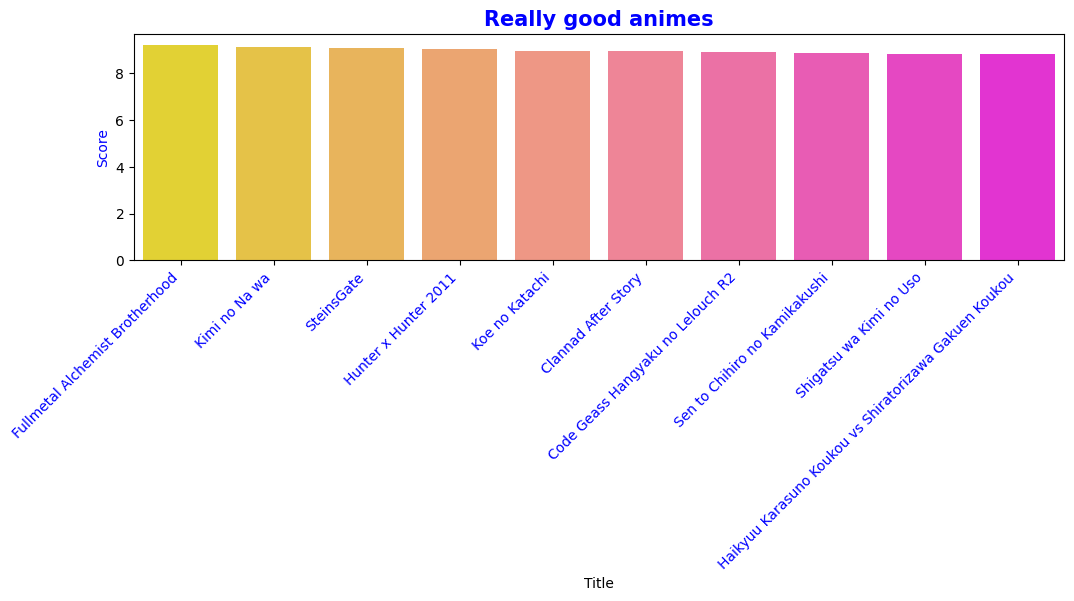

In [ ]:
plt.figure(figsize=(12, 3), dpi=100)


best_score = q_animes.sort_values(by=['Score'], ascending=False)[:10]


g = sns.barplot(best_score["Title"], best_score['Score'], palette="spring_r")
plt.ylabel("Score", color = 'b')
plt.xticks(rotation=45, horizontalalignment='right', color = 'b')
plt.title('Really good animes', fontweight='bold', fontsize=15, color = 'b');

In [ ]:
best_scores = best_score[['Score','Title','Genre', 'Studio', 'Type']].set_index('Title')
display(best_scores)

,Score,Genre,Studio,Type
Title,,,,
Fullmetal Alchemist Brotherhood,9.200548,"['Action', 'Military', 'Adventure', 'Comedy', ...",['Bones'],TV
Kimi no Na wa,9.114959,"['Supernatural', 'Drama', 'Romance', 'School']",['CoMix Wave Films'],Movie
SteinsGate,9.078329,"['Thriller', 'Sci-Fi']",['White Fox'],TV
Hunter x Hunter 2011,9.025276,"['Action', 'Adventure', 'Super Power', 'Shounen']",['Madhouse'],TV
Koe no Katachi,8.928254,"['Drama', 'School', 'Shounen']",['Kyoto Animation'],Movie
Clannad After Story,8.919896,"['Slice of Life', 'Comedy', 'Supernatural', 'D...",['Kyoto Animation'],TV
Code Geass Hangyaku no Lelouch R2,8.890421,"['Action', 'Military', 'Sci-Fi', 'Super Power'...",['Sunrise'],TV
Sen to Chihiro no Kamikakushi,8.855878,"['Adventure', 'Supernatural', 'Drama']",['Studio Ghibli'],Movie
Shigatsu wa Kimi no Uso,8.804131,"['Drama', 'Music', 'Romance', 'School', 'Shoun...",['A-1 Pictures'],TV


In [ ]:
anime['Synopsis'].isnull().sum()

1419

In [ ]:
anime['Synopsis'] = anime['Synopsis'].fillna('')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(anime['Synopsis'])

tfidf_matrix.shape

(17002, 45350)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.22691949, 0.02116274, ..., 0.        , 0.        ,
        0.        ],
       [0.22691949, 1.        , 0.03335443, ..., 0.        , 0.        ,
        0.        ],
       [0.02116274, 0.03335443, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
indices = pd.Series(anime.index, index=anime['Title']).drop_duplicates()
indices

Title
Cowboy Bebop                                         0
Cowboy Bebop Tengoku no Tobira                       1
Trigun                                               2
Witch Hunter Robin                                   3
Bouken Ou Beet                                       4
                                                 ...  
Sore Ike Anpanman Anpanman to Kaizoku Lobster    16997
X Bomber                                         16998
X Bomber Pilot                                   16999
Gankochan                                        17000
Original CVP Momoko                              17001
Length: 17002, dtype: int64

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 15 most similar movies
    sim_scores = sim_scores[1:16]
    
    movie_indices = [i[0] for i in sim_scores]

    return anime['Title'].iloc[movie_indices]

In [ ]:
get_recommendations('Sen to Chihiro no Kamikakushi')

10061                                Shounen Maid
16592                                    Sankarea
570                            Kujibiki Unbalance
4622                          Suki Desu Suzukikun
5653        Kami nomi zo Shiru Sekai 4nin to Idol
3348                  KerakuNoOH King of Pleasure
10666                         Kushimitama Samurai
6011                                 Sankarea OVA
2472                        ef A Tale of Memories
2874                                    Kiss yori
4284         ef A Tale of Memories  Recollections
752                                    Jyu Oh Sei
15714                          Cinnamon no Parade
15170    Naruto Shippuuden Movie 6  Road to Ninja
12846                              Mirai no Mirai
Name: Title, dtype: object

In [ ]:
get_recommendations('Koe no Katachi')

13934    Seishun Buta Yarou wa Yumemiru Shoujo no Yume ...
1272                                      Asatte no Houkou
5739                                          Hero Herokun
1756                                                  Pops
9572                                     Yuujou no Kickoff
6659                                          Danchi Tomoo
4837                        Fortune Arterial Akai Yakusoku
6786                         Kakumeiki Valvrave 2nd Season
14565                               Tomo Tabidachi no Toki
16431                                    Momons Sand Witch
9375                         Gakuen Handsome The Animation
10688                                      Gakuen Handsome
6646                                        Harisu no Kaze
13293                    Hitoribocchi no Marumaru Seikatsu
11405                                           Tejina Shi
Name: Title, dtype: object

In [ ]:
anime.head(2)

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bountyâsuch is the life...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...


In [ ]:
features = ['Genre','Producer', 'Studio']

print(anime[features].isnull().sum())

Genre       2012
Producer    9367
Studio      9083
dtype: int64


In [ ]:
anime[features] = anime[features].fillna('[' ']')

In [ ]:
from ast import literal_eval

for feature in features:
    anime[feature] = anime[feature].apply(literal_eval)

In [ ]:
anime.Type.unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music', 'Unknown', nan],
      dtype=object)

In [ ]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ","")) for i in x]
    
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ",""))
        else:
            return ""

In [ ]:
features = ['Genre','Producer', 'Studio', 'Type']

for feature in features:
    anime[feature] = anime[feature].apply(clean_data)

In [ ]:
anime.head(2)

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"[action, adventure, comedy, drama, sci-fi, space]","In the year 2071, humanity has colonized sever...",tv,[bandaivisual],[sunrise],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop Tengoku no Tobira,"[action, space, drama, mystery, sci-fi]","Another day, another bountyâsuch is the life...",movie,"[sunrise, bandaivisual]",[bones],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...


In [ ]:
features

['Genre', 'Producer', 'Studio', 'Type']

In [ ]:
def create_soup(x):
    return " ".join(x['Genre']) + " " + x['Type'] + " " + " ".join(x['Producer']) + " " + " ".join(x['Studio']) + " " + x['Synopsis'] + " " + " ".join(x['Studio']) 

In [ ]:
anime['soup'] = anime.apply(create_soup, axis=1)

In [ ]:
anime['soup']

0        action adventure comedy drama sci-fi space tv ...
1        action space drama mystery sci-fi movie sunris...
2        action sci-fi adventure comedy drama shounen t...
3        action magic police supernatural drama mystery...
4        adventure fantasy shounen supernatural tv  toe...
                               ...                        
16997                                          special    
16998                                               tv    
16999                                          special    
17000                                                     
17001                                              ova    
Name: soup, Length: 17002, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(anime['soup'])

from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
anime = anime.reset_index()
indices = pd.Series(anime.index, index=anime['Title'])

In [ ]:
indices

Title
Cowboy Bebop                                         0
Cowboy Bebop Tengoku no Tobira                       1
Trigun                                               2
Witch Hunter Robin                                   3
Bouken Ou Beet                                       4
                                                 ...  
Sore Ike Anpanman Anpanman to Kaizoku Lobster    16997
X Bomber                                         16998
X Bomber Pilot                                   16999
Gankochan                                        17000
Original CVP Momoko                              17001
Length: 17002, dtype: int64

In [ ]:
get_recommendations('Cowboy Bebop', cosine_sim2)

5616                                Planetes Picture Drama
1                           Cowboy Bebop Tengoku no Tobira
13882                                       Top wo Nerae 3
14549                                New HyakujuuOu GoLion
13166                                              Ladyspo
13130                                           Zoids Wild
2318          Ginga Tetsudou Monogatari Eien e no Bunkiten
11099                                    Making of Lensman
5075                  Ginga Hyouryuu Vifam Atsumatta 13nin
5081                  Shin Mashin Eiyuuden Wataru Majinzan
3289                                  Ginga Senpuu Braiger
10413    Mobile Suit Gundam 0083 Stardust Memory Pictur...
13902                                          Yusei Kamen
4173                   Sora wo Kakeru Shoujo Picture Drama
13593                           Voltron Legendary Defender
Name: Title, dtype: object

In [ ]:
get_recommendations('Sen to Chihiro no Kamikakushi', cosine_sim2)

15170           Naruto Shippuuden Movie 6  Road to Ninja
752                                           Jyu Oh Sei
12846                                     Mirai no Mirai
10061                                       Shounen Maid
4635                             Karigurashi no Arrietty
10666                                Kushimitama Samurai
2727                                      Hatenkou Yuugi
16592                                           Sankarea
7619     Kero Kero Keroppi no Yowamushiouji no Daibouken
10040                                    Kemushi no Boro
6610           Ashita Genki ni Nare Hanbun no Satsumaimo
15144                   Kino no Tabi The Beautiful World
5420                                Da Yu Hai Tang Movie
6263                      Majokko Shimai no Yoyo to Nene
1017              Fushigi no Umi no Nadia Original Movie
Name: Title, dtype: object

In [ ]:
get_recommendations('Mirai no Mirai', cosine_sim2)

3545                             Umineko no Naku Koro ni
3889                                   Suteneko Torachan
2319                                       Umi no Triton
4320                           Doubutsu Mura no Daisodou
9944                    Tenchi Muyou Ryououki 4th Season
12024                                        Yao Shen Ji
5237                                               Oshin
6703                                         Golden Time
5905                        Ookami Kodomo no Ame to Yuki
6180                           Kono Sekai no Katasumi ni
305                            Mama wa Shougaku 4 Nensei
13450      Sayonara no Asa ni Yakusoku no Hana o KazarÅ
8728                                           Hand Soap
6526                                 Dareka no Manazashi
8653     Kyoukai no Kanata Movie 2 Ill Be Here  Miraihen
Name: Title, dtype: object

In [ ]:
display(anime[['Title', 'Rating', 'Producer', 'Studio']].loc[anime['Title'] == 'Sen to Chihiro no Kamikakushi'])

,Title,Rating,Producer,Studio
183,Sen to Chihiro no Kamikakushi,8.92,[toho],[studioghibli]
